In [1]:
import numpy as np
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
import Convert
from ipy import *

In [2]:
dateOct26 = dt.datetime(2015,10,26,4,0,0,0)

In [3]:
print dateOct26

2015-10-26 04:00:00


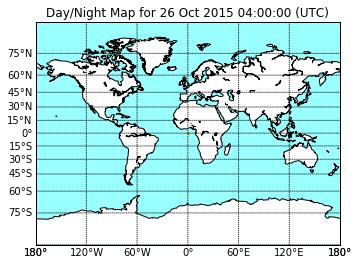

20015077.3712 14675034.4036


In [58]:
terminator_date = dateOct26
# draw map with markers for float locations
mill_map = Basemap(projection='mill',lon_0=0)
mill_map.drawcoastlines()
mill_map.drawparallels(np.arange(-90,90,15),labels=[1,0,0,0])
mill_map.drawmeridians(np.arange(mill_map.lonmin,mill_map.lonmax+30,60),labels=[0,0,0,1])
Nx, Ny = mill_map(0,0)
Sx, Sy = mill_map(0,0)
mill_map.drawmapboundary(fill_color='#99ffff')
mill_map.fillcontinents(color='#ffffff',lake_color='#99ffff')
mill_map.scatter(Nx,Ny,3,marker='o',color='y')
mill_map.scatter(Sx,Sy,3,marker='o',color='y')
#CS=mill_map.nightshade(terminator_date)
plt.title('Day/Night Map for %s (UTC)' % terminator_date.strftime("%d %b %Y %H:%M:%S"))
plt.show()
print Nx, Ny

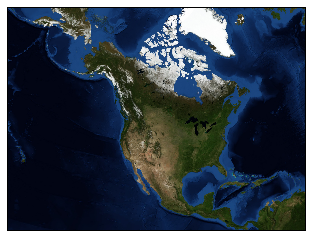

In [5]:
my_map = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
my_map.bluemarble()
plt.show()

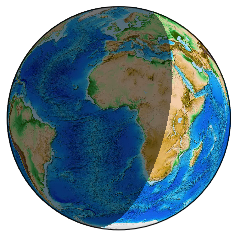

In [7]:
my_map2 = Basemap(projection='ortho',lat_0=0,lon_0=0)
my_map2.etopo()
my_map2.nightshade(dateOct26)

In [25]:
Fieldline_file = 'c:/users/cschiff/documents/GitHub/PAD/Oct 26 - pictures/Oct_26_04_00_00_fieldline_contiguous.txt'
Fieldline      = open(Fieldline_file,'r')
fld_blob       = Fieldline.readlines()
Fieldline.close()
fld            = np.zeros((len(fld_blob),3))

counter  = 0
for f in fld_blob:
    fld[counter,:] = map(float,f.strip('\r\n').split())
    counter        = counter + 1

In [9]:
MEC_file = 'X:/data/ftp/mms1/mec/srvy/l2/epht89d/2015/10/mms1_mec_srvy_l2_epht89d_20151026_v2.0.0.cdf'

In [10]:
MEC = pycdf.CDF(MEC_file)

In [70]:
epoch_dict          = {}
epoch_dict['year']  = 2015
epoch_dict['month'] = 7
epoch_dict['day']   = 31
epoch_dict['hour']  = 20
epoch_dict['min']   = 0
epoch_dict['sec']   = 0

In [71]:
A_ecef_2_gci             = Convert.convert_ECEF_to_GCI(epoch_dict)
A_gci_2_gse              = Convert.convert_GCI_to_GSE(epoch_dict)
A_gse_2_gsm              = Convert.convert_GSE_to_GSM(epoch_dict)
A_ecef_2_gsm             = A_gse_2_gsm.dot(A_gci_2_gse.dot(A_ecef_2_gci))
A_gsm_2_ecef             = A_ecef_2_gsm.transpose()
A_gci_2_gsm              = A_gse_2_gsm.dot(A_gci_2_gse)
sun_pos_GCI, sun_vel_GCI = Convert.SunEph.CalcSun_Low(epoch_dict)
sun_pos_ECEF             = A_ecef_2_gci.transpose().dot(sun_pos_GCI)
unit_sun_pos_ECEF        = sun_pos_ECEF/np.sqrt(sun_pos_ECEF.dot(sun_pos_ECEF))
gsm_lat = np.arcsin(unit_sun_pos_ECEF[2])*180/np.pi
gsm_lon = np.arctan2(unit_sun_pos_ECEF[1],unit_sun_pos_ECEF[0])*180/np.pi
print gsm_lat, gsm_lon

18.1894726653 -117.654360328


In [73]:
r_GCI = np.array([-5.9,-9.6,-4.2])
r_GSM = A_gci_2_gsm.dot(r_GCI)
print r_GSM

[ -4.56516964  11.04510423  -1.33225321]


In [44]:
N  = 480
Re = 6378.14
print MEC['Epoch'][N]
print MEC['mms1_mec_r_eci'][N]/Re
print MEC['mms1_mec_r_gse'][N]/Re
print MEC['mms1_mec_r_gsm'][N]/Re
print A_gci_2_gse.dot(MEC['mms1_mec_r_eci'][N])/Re

2015-10-26 04:00:00
[-6.5279739  -5.82887152 -2.74775593]
[ 8.95615735  1.9714244  -0.20268331]
[ 8.95615735  1.80475337 -0.81881619]
[ 8.96372565  1.93676683 -0.20225233]


In [64]:
nfoot_GSM = fld[0,:]
sfoot_GSM = fld[-1,:]
nfoot_ECEF = A_gsm_2_ecef.dot(nfoot_GSM)
sfoot_ECEF = A_gsm_2_ecef.dot(sfoot_GSM)
print np.sqrt(nfoot_ECEF.dot(nfoot_ECEF))
nlon = np.arctan2(nfoot_ECEF[1],nfoot_ECEF[0])*180/np.pi
nlat = np.arcsin(nfoot_ECEF[2])*180/np.pi
slon = np.arctan2(sfoot_ECEF[1],sfoot_ECEF[0])*180/np.pi
slat = np.arcsin(sfoot_ECEF[2])*180/np.pi
NLON = [nlon]*10
NLAT = [nlat]*10
SLON = [slon]*10
SLAT = [slat]*10

0.999999961156


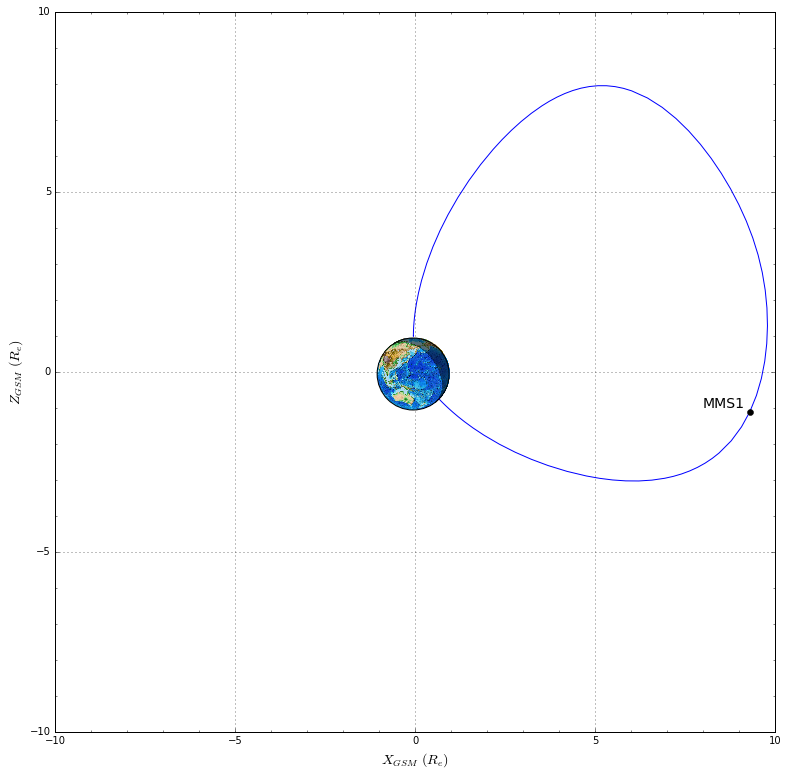

In [74]:
max_re    = 10.0
#max_re    = 6.0
re_scale  = 2*max_re
earth_loc = 0.5-np.sqrt(2.0)/re_scale+0.06*3.0/max_re
az        = 0

fig3 = plt.figure(3,figsize=(10,10))

ax1  = fig3.add_axes([0.0,0.0,1.0,1.0])
#ax1  = fig3.add_axes([0.0,0.0,1.0,1.0],projection='3d')
ax1.set_xlim([-max_re,max_re])
ax1.set_ylim([-max_re,max_re])
#ax1.set_zlim([-max_re,max_re])
ax1.minorticks_on()
ax1.plot(fld[:,0],fld[:,2])
ax1.plot(9.3,-1.1,'ko')
ax1.grid('on')
ax1.set_xlabel(r'$X_{GSM}$ $(R_e)$',fontsize=14)
ax1.set_ylabel(r'$Z_{GSM}$ $(R_e)$',fontsize=14)
ax1.annotate('MMS1',xy=[8.0,-1],fontsize=14)
#ax1.plot(fld[:,0],fld[:,1],fld[:,2])
#ax1.view_init(elev=0,azim=0)

ax2     = fig3.add_axes([earth_loc,earth_loc,1.0/max_re,1.0/max_re])
my_map2 = Basemap(projection='ortho',lat_0=gsm_lat,lon_0=-90+gsm_lon)
my_map2.etopo()
my_map2.nightshade(dateOct26)
my_map2.ax = ax2

plt.show()

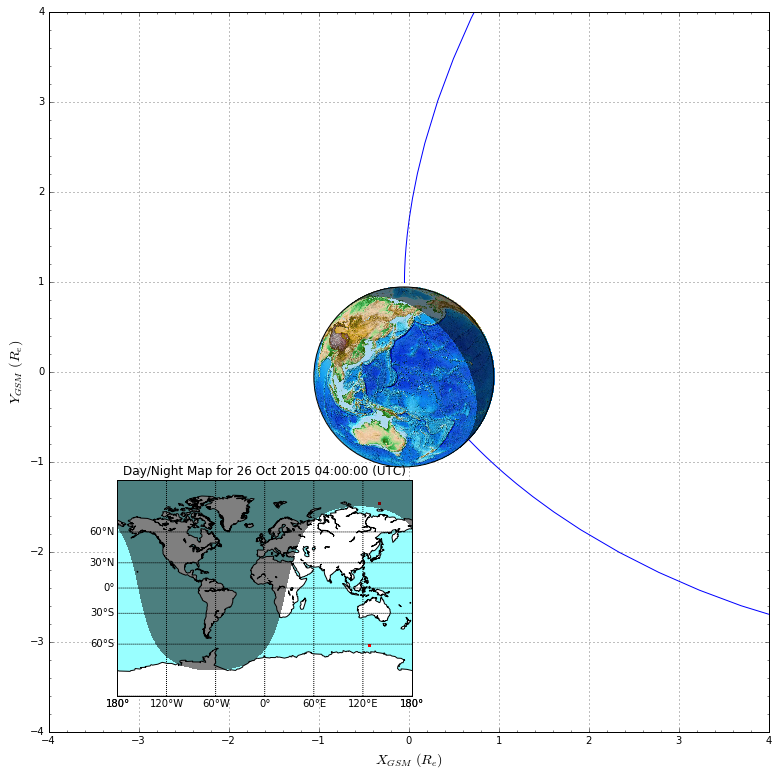

In [75]:
#max_re    = 10.0
max_re    = 4.0
re_scale  = 2*max_re
earth_loc = 0.5-np.sqrt(2.0)/re_scale+0.06*3.0/max_re
az        = 0

fig3 = plt.figure(3,figsize=(10,10))

ax1  = fig3.add_axes([0.0,0.0,1.0,1.0])
#ax1  = fig3.add_axes([0.0,0.0,1.0,1.0],projection='3d')
ax1.set_xlim([-max_re,max_re])
ax1.set_ylim([-max_re,max_re])
#ax1.set_zlim([-max_re,max_re])
ax1.minorticks_on()
ax1.plot(fld[:,0],fld[:,2])
ax1.plot(9.3,-1.1,'ko')
ax1.grid('on')
ax1.set_xlabel(r'$X_{GSM}$ $(R_e)$',fontsize=14)
ax1.set_ylabel(r'$Y_{GSM}$ $(R_e)$',fontsize=14)
ax1.annotate('MMS1',xy=[8.04,-1],fontsize=14)
#ax1.plot(fld[:,0],fld[:,1],fld[:,2])
#ax1.view_init(elev=0,azim=0)

ax2     = fig3.add_axes([earth_loc,earth_loc,1.0/max_re,1.0/max_re])
my_map2 = Basemap(projection='ortho',lat_0=gsm_lat,lon_0=-90+gsm_lon)
my_map2.etopo()
my_map2.nightshade(dateOct26)
my_map2.ax = ax2

ax3     = fig3.add_axes([0.0,0.05,0.6,0.3],frameon=True)
# miller projection
mill_map = Basemap(projection='mill',lon_0=0)
mill_map.ax = ax3
# plot coastlines, draw label meridians and parallels.
mill_map.drawcoastlines()
mill_map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0])
mill_map.drawmeridians(np.arange(mill_map.lonmin,mill_map.lonmax+30,60),labels=[0,0,0,1])
# fill continents 'coral' (with zorder=0), color wet areas 'aqua'
mill_map.drawmapboundary(fill_color='aqua')
mill_map.fillcontinents(color='white',lake_color='aqua')
mill_map.drawmapboundary(fill_color='#99ffff')
mill_map.fillcontinents(color='#ffffff',lake_color='#99ffff')
Nx, Ny = mill_map(NLON,NLAT)
Sx, Sy = mill_map(SLON,SLAT)
mill_map.scatter(Nx,Ny,3,marker='o',color='r')#,markersize = 20)
mill_map.scatter(Sx,Sy,3,marker='o',color='r')#,markersize = 20)
# shade the night areas, with alpha transparency so the
# map shows through. Use current time in UTC.
#date = datetime.utcnow()
CS=mill_map.nightshade(dateOct26)
plt.title('Day/Night Map for %s (UTC)' % dateOct26.strftime("%d %b %Y %H:%M:%S"))

plt.show()

In [22]:
fld

array([], shape=(0L, 3L), dtype=float64)